### Unsupervised learning

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

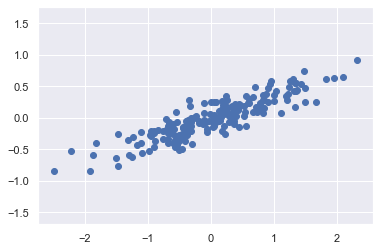

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values. In principal component analysis, one quantifies this relationship by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [8]:
from sklearn.decomposition import PCA 
    
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_) # “components” to define the direction of the vector
print(pca.explained_variance_) # “explained variance” to define the squared-length of the vector

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


These vectors represent the principal axes of the data, and the length shown is an indication of how “important” that axis is in describing the distribution of the data more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the “principal components” of the data. This transformation from data axes to principal axes is as an affine transformation, which basically means it is composed of a translation, rotation, and uniform scaling.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)  # or pca.fit_transform(X)
print("original shape: ", X.shape) 
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


 Inverse transform of this reduced data and plot it along with the original data

(-2.77152878069022, 2.661757596590676, -0.9964674432667124, 1.0219081775900811)

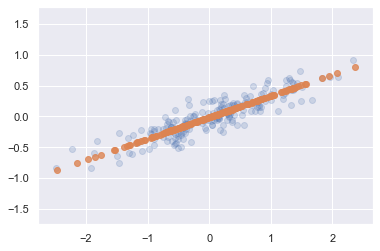

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

The light points are the original data, while the dark points are the projected version. 

This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. 

This reduced-dimension dataset is in some senses “good enough” to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points is mostly preserved.

In [13]:
from sklearn.datasets import load_digits 
digits = load_digits()
digits.data.shape

(1797, 64)

In [18]:
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape) 
print(projected.shape)

(1797, 64)
(1797, 2)


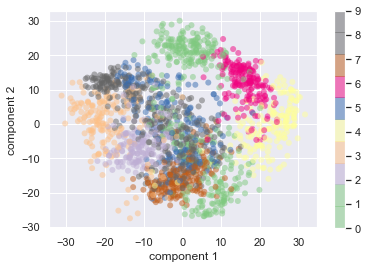

In [26]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

The full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64- dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### X =mean+x1· basis1 +x2· basis2 +x3· basis3⋯

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. The principal components, which act as the low- dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. We can determine this by looking at the cumulative explained variance ratio as a function of the number of components

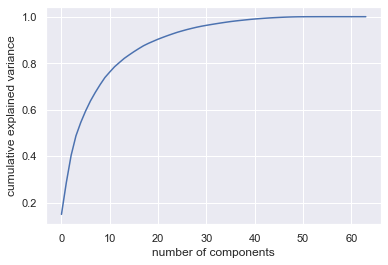

In [27]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

### PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

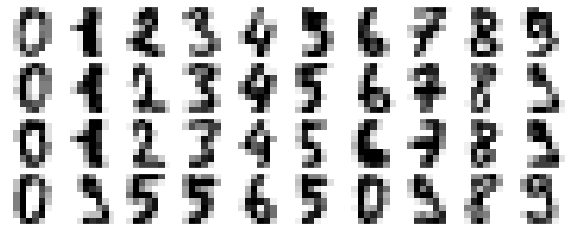

In [28]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                cmap='binary', interpolation='nearest',
                clim=(0, 16))
plot_digits(digits.data)

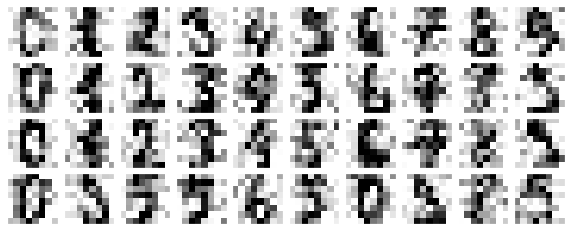

In [29]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Here 50% of the variance amounts to 12 principal components. 

In [30]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

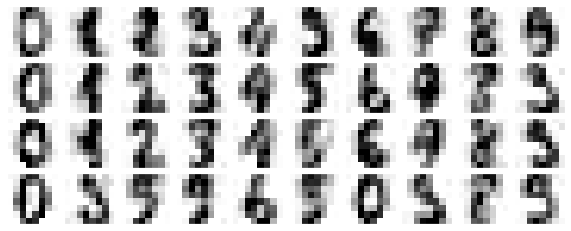

In [31]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

### Example: Eigenfaces

RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data